In [1]:
#importing the required modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import anderson, wilcoxon, ttest_ind

In [2]:
home_dir = os.path.join(r'Z:\balint\numt\Michael\data/')

In [3]:
#read pandas dataframe
numt_array = pd.read_csv(home_dir + 'numt_master_array.csv')
numt_array.head()

,score,eg2_value,e_value,g_id,g_start,mt_start,g_length,mt_length,g_strand,mt_strand,g_size,g_sequence,mt_sequence,g_up_flanking,g_down_flanking,"mt_up_flanking (if strand is negative, the coordinates are corrected)","mt_down_flanking (if strand is negative, the coordinates are corrected)",ensembl_gene_id,ensembl_description
0,17245,0.0,0.0,MT,0,0,17245,17245,+,+,17245,GTTAATGTAGCTTAACAACAAAGCAAAGCACTGAAAATGCTTAGAT...,GTTAATGTAGCTTAACAACAAAGCAAAGCACTGAAAATGCTTAGAT...,NaN,NaN,TACAAATTGTATAATATTTGGACTAAACCCCCTTTCCCACCCCAAG...,GTTAATGTAGCTTAACAACAAAGCAAAGCACTGAAAATGCTTAGAT...,ENSOCUG00000029081,NaN
1,3398,0.0,0.0,1,114731432,6976,4680,4681,+,+,194850757,taGTAAAATTATTACATAACTTTGTCGAAGTTAATTTATAGGTTCA...,TAGTAAAACCATTACATAACTTTGTCGAAGTTAATTTATAGGTTCA...,ACAAAAGACTCTGAATAGCCAAAGCGATCCTGAACAAGAAAAATCA...,TATATATATTTATATATATATGTATATATGTACATATATATAACTA...,CCTTCGCCTCAAAACGAGAAGTAGAGACTATTGAACTAACAACCAC...,AACTGCTAATTCATGCTCCCATGTCTAACCCCATGGCTTTCTCAAC...,ENSOCUG00000006104,cilia and flagella associated protein 300 [Sou...
2,3120,0.0,0.0,GL019308,67160,883,4892,4945,+,+,88228,CAAGGCCATGAAGCATGCACACACTGCCCATCGCTCTCCTCAAACA...,CAAGGCCATGAAGCACGCACACACCGCCCGTCACCCTCCTCAAGTG...,GATAAACCCCGATAAACTTTACCACTCTTTGCCAACTCAGCCTCTA...,ATGAAGGGGCAAAGAGTAATTTTACAGTCGAGAGGGCTAGCAGTCA...,TACCGCCATCTTCAGCGAACCCTAAAAAGGAGCAAAAGTAAGCTCA...,TAGGGGCTATTAACTTTATTACAACTATTATTAATATGAAAGCCCC...,ENSOCUG00000031196,NaN
3,1888,0.0,0.0,GL019308,62527,12805,3439,3462,+,+,88228,AATTATTCATAGCCTCAATGATGAACAAGACATCCAAAAAACAGGA...,AATTATTCACAGCCTcaaTGATGAACAGGATATCCGAAAGATAGGC...,GTAGGAATTATATCCTTCCTCCTCATCGGCTGATGGCATGGCCAAG...,ACGTATACATGAGTTGTTCTTACATAATTGAATATACCTGCAATGC...,TGCCTAGGCGCAATCACTACCTTATTCACAGCCCTATGTGCCCTCA...,GTACACCCGTACGCACGCACGTACACCCGTACGCACGCACGTACAC...,ENSOCUG00000037635,NaN
4,1824,0.0,0.0,AAGW02081594,14016,6061,3040,3073,+,+,24576,TTCTTTGGACACCCTGAGGTATATATTCTTATCCTTCCAGGATTCG...,TTTTTCGGGCACCCCGAAGTATATATTCTTATTCTTCCAGGATTTG...,GACATGTCAAAGGAACGCAGAAGCCAGCTTGAAAAAGTCCTCAACA...,TGAAATAGCTATCACTATTCAGGTATGCCACTATTCTTCTAGGCAT...,ATATGAAAGCCCCTGCAATATCTCAATATCAAACCCCCTTATTCGT...,ATTCTCCTAGGTATCTATTTTACCCTACTTCAAGCATCGGAGTATT...,NaN,NaN


In [4]:
#get g_ids and drop the ones that dont have corresponding sequences
g_ids = numt_array['g_id'].drop_duplicates()
g_ids = g_ids.drop(labels = [0,65])

In [5]:
#create dictionary from the numtless sequences
def create_dictionary(g_id):
    global numtless_sequences
    filename = 'numtless_sequences/%s.fasta' % g_id
    sequence = ''
    with open (home_dir + filename) as infile:
        content = infile.readlines()
        try:
            sequence = content[1]
        except IndexError:
            pass
    numtless_sequences[g_id] = sequence
    current_index = g_ids[g_ids == g_id].index[0]
    if current_index % 5 == 0:
        print('done for %s numts!' % current_index)

In [6]:
#create vector for numtless sequences
numtless_sequences = pd.Series(index = g_ids)
g_ids.apply(create_dictionary)
numtless_sequences

C:\Users\pytho\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


done for 20 numts!
done for 25 numts!
done for 40 numts!
done for 45 numts!
done for 70 numts!
done for 95 numts!
done for 100 numts!
done for 105 numts!
done for 125 numts!


g_id
1               AGGACCGCACAACCTTGCAGCTCAGCGACTCGTGGGGTCACACACA...
GL019308        AGCATTTCCAGCATGCAGTCTCTCCCATGAAGGTGGAGAAGGAACT...
AAGW02081594    TTATCTTTATTTCATCCATGATCAAATATTTCACCCACGATGATTA...
GL019326        GAGACTGGGAAGAAGCTCCTGGCTCCTGGCTTTGGATCAGCGCAGC...
GL018741        TAAAACTAAGAGTCATTCTAATCTTTCCTCTATATCTAATCCCAAC...
18              NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
9               CGGGGACTCCCACTAGAGGAACCAGGTGATGTCAGTTCCCAGAATC...
12              CTGAGTTCCTGGCTTCTGGCTTTGGCCTGGCTCAACCCCAGCTGCA...
GL018705        ATAATGATCAGATGATAATGGTGGTGATGATGGTGAGGATGACTCT...
17              GGTGTGGTATATGTGGTGTGTATGGTATGTGTGTGGTACTGTATGG...
GL018700        CCAGATGGATACATGAAGTATGCAGTTGCCTATGTAGTTTAGAACT...
19              NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
GL019465        ATACTTGGCTCCCCACCCAGGAGATCGCAGCTTGAGGCATCACCCC...
GL018817        ACCTAATTACAGGGCACCGGTCTATTTAAAAGATATGTTAAGGGAC...
13              TCATAATCCTAACCATAACCAAGGATTCAACCATAAATTTAAGACT...
GL018

In [7]:
lengths = g_ids.apply(lambda x : numt_array.loc[numt_array['g_id'] == x]['g_length'].tolist())
lengths.index = g_ids
lengths

g_id
1               [4680, 698, 1012, 375, 371, 467, 393, 658, 773]
GL019308                           [4892, 3439, 1414, 837, 820]
AAGW02081594                            [3040, 2339, 1650, 577]
GL019326                     [1851, 1451, 1315, 1420, 995, 833]
GL018741                           [1945, 1590, 1074, 552, 503]
18                                        [1440, 407, 292, 482]
9                                          [720, 822, 397, 273]
12                                              [419, 216, 368]
GL018705                                                  [834]
17                                              [595, 407, 352]
GL018700                                                  [896]
19                                                        [930]
GL019465                              [930, 677, 795, 424, 916]
GL018817                                  [674, 1070, 784, 720]
13                                                   [351, 126]
GL018826              [1193, 891, 8

In [8]:
#get the sequence samples
def sampling(g_id):
    np.random.seed(6)
    sequence_to_sample = numtless_sequences[g_id]
    numt_sizes = lengths[g_id]
    samples = []
    for index, numt_size in enumerate(numt_sizes):
        start = np.random.randint(0, (len(sequence_to_sample) - numt_size))
        end = start + numt_size
        sample_sequence = sequence_to_sample[start:end]
        samples.append(sample_sequence)
    return samples

In [9]:
#get samples sequences
sequence_samples = g_ids.apply(sampling)
sequence_samples.index = g_ids
sequence_samples

g_id
1               [TAAACACAACATACAAAAACTTATGTGATACAGCAAAAAGCAGTT...
GL019308        [AGTCAGGCAAATAAAAGACTAAACTTTGTCTTAATTACATTAAAT...
AAGW02081594    [ATATCAGTCTTTACTCAGTAGTCCCTCATCTTATTCAGGGACTGA...
GL019326        [GTCTTTGGGCCCTTGCACCTGCATGGAAGACCTGGAAGAAGCTCC...
GL018741        [AGACCACTCAGTTCTGAGGATGCTTTTTAGGCATAAAAACGGATG...
18              [TTTCATTTCAGACTATGACAGTCCCAAACCTACAGAATCATGCTT...
9               [GTTCCAACTGTAATAAACCAGTCTGCGGGCTGCTCACCTCAAGCC...
12              [AAAATCATTTACAAATATTTGCTGATGTATTTCACAAAGACTAAA...
GL018705        [TTAAAATTTCAGGTGTCTTGCAGATTTTGGAGTATTTTCATGTAC...
17              [AAAGGAATGAAATACGTTTGGGGGGAGTAAACTGACTGGAATCAG...
GL018700        [GAGGAGACCAATGGGAAGCCTGCTAAATGCTCTGACTTGAGGATA...
19              [GCCTGGCGCTGCTCCGGCTCCAACAGGGCAGGGCCTGGTGCACAG...
GL019465        [AACCATATGATTATCTCAATAGATGCTGAGAAGGCATTTGATAAA...
GL018817        [TCCCTGTCAACGCACCCGGGAAGATGATGGTCCACATGCATGGGC...
13              [CATGGAAGACCCAGAGGAGGCTCCTGGCTCCTGGCTTCAGATCGG...
GL018

In [10]:
#calculate gc contents of sequence samples
def gc_content(sample_sequences):
    gc_contents = []
    for sample_sequence in sample_sequences:
        g_content = sample_sequence.upper().count('G')
        c_content = sample_sequence.upper().count('C')
        gc_content = (g_content + c_content) / len(sample_sequence)
        gc_contents.append(gc_content)
    return gc_contents

In [11]:
#calculate gc content of sample sequences
gc_content_samples = sequence_samples.apply(gc_content)
gc_content_samples.index = g_ids
gc_content_samples

g_id
1               [0.42799145299145297, 0.26504297994269344, 0.4...
GL019308        [0.419664758789861, 0.3570805466705438, 0.4964...
AAGW02081594    [0.36907894736842106, 0.3463018383924754, 0.34...
GL019326        [0.32198811453268505, 0.4238456237077877, 0.47...
GL018741        [0.4832904884318766, 0.6245283018867924, 0.512...
18              [0.3611111111111111, 0.4103194103194103, 0.527...
9               [0.45416666666666666, 0.3771289537712895, 0.57...
12              [0.37708830548926014, 0.35185185185185186, 0.5...
GL018705                                    [0.37050359712230213]
17              [0.3865546218487395, 0.457002457002457, 0.5369...
GL018700                                     [0.3861607142857143]
19                                           [0.5924731182795699]
GL019465        [0.4344086021505376, 0.4623338257016248, 0.430...
GL018817        [0.4540059347181009, 0.5906542056074766, 0.575...
13                       [0.4358974358974359, 0.5396825396825397]
GL018

In [12]:
#calculate the gc content of numts
def numts_gc(g_id):
    df = numt_array.loc[numt_array['g_id'] == g_id]
    gc_content = df['g_sequence'].apply(lambda x : (x.count('G') + x.count('C')) / len(x.replace('N','')))
    return gc_content.tolist()

In [13]:
#calculate the gc content of numts
numts_gc = g_ids.apply(numts_gc)

In [14]:
numts_gc.index = g_ids
numts_gc

g_id
1               [0.3843689942344651, 0.35704323570432356, 0.36...
GL019308        [0.3726519894970713, 0.38018433179723504, 0.34...
AAGW02081594    [0.387264457439896, 0.3499790180444817, 0.3605...
GL019326        [0.36746666666666666, 0.3604336043360434, 0.36...
GL018741        [0.34470647265429, 0.3409371146732429, 0.31738...
18              [0.3429724277067922, 0.34688995215311, 0.29391...
9               [0.3337856173677069, 0.29832935560859186, 0.36...
12              [0.31116389548693585, 0.3669724770642202, 0.28...
GL018705                                    [0.33568075117370894]
17              [0.39195979899497485, 0.2684085510688836, 0.36...
GL018700                                     [0.2809110629067245]
19                                           [0.3960703205791106]
GL019465        [0.3960703205791106, 0.41594202898550725, 0.34...
GL018817        [0.41884057971014493, 0.3397548161120841, 0.34...
13                       [0.3926553672316384, 0.4126984126984127]
GL018

In [15]:
#function for merging gc contents
def merge(gc_content):
    global sum_gc
    sum_gc += gc_content

In [16]:
#get merged gc content of numts
sum_gc = []
numts_gc.apply(merge)
len(sum_gc)

122

In [17]:
numts_gc = sum_gc
len(numts_gc)

122

In [18]:
sum_gc = []
gc_content_samples.apply(merge)
samples_gc = sum_gc
len(samples_gc)

122

In [30]:
#numts_gc

In [19]:
samples_gc

[0.42799145299145297,
 0.26504297994269344,
 0.4841897233201581,
 0.4693333333333333,
 0.4366576819407008,
 0.46466809421841543,
 0.35368956743002544,
 0.6337386018237082,
 0.5769728331177232,
 0.419664758789861,
 0.3570805466705438,
 0.49646393210749645,
 0.36081242532855434,
 0.35121951219512193,
 0.36907894736842106,
 0.3463018383924754,
 0.34545454545454546,
 0.4540727902946274,
 0.32198811453268505,
 0.4238456237077877,
 0.4783269961977186,
 0.41056338028169015,
 0.4592964824120603,
 0.4417767106842737,
 0.4832904884318766,
 0.6245283018867924,
 0.5121042830540037,
 0.5815217391304348,
 0.5029821073558648,
 0.3611111111111111,
 0.4103194103194103,
 0.5273972602739726,
 0.0,
 0.45416666666666666,
 0.3771289537712895,
 0.5717884130982368,
 0.32967032967032966,
 0.37708830548926014,
 0.35185185185185186,
 0.5516304347826086,
 0.37050359712230213,
 0.3865546218487395,
 0.457002457002457,
 0.5369318181818182,
 0.3861607142857143,
 0.5924731182795699,
 0.4344086021505376,
 0.46233382570

In [20]:
#normality testing of numts gc
numts_normality = anderson(numts_gc)
numts_stat = numts_normality[0]
numts_critical_value = numts_normality[1][2]

In [21]:
#normality testing of samples gc
samples_normality = anderson(samples_gc)
samples_stat = samples_normality[0]
samples_critical_value = samples_normality[1][2]

In [22]:
#statistics (normality testing and significance)
if (numts_stat > numts_critical_value) or (samples_stat > samples_critical_value):
    significance = wilcoxon(numts_gc, samples_gc)
else:
    significance = ttest_ind(numts_gc, samples_gc)
significance[1]

2.4398949967887656e-15

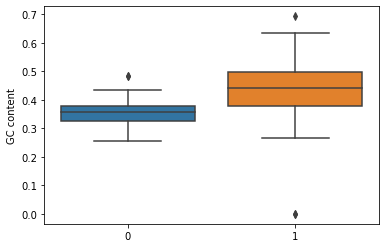

In [23]:
data = [numts_gc, samples_gc]
ax = sns.boxplot(data=data)
ax.set_ylabel('GC content')
plt.show()

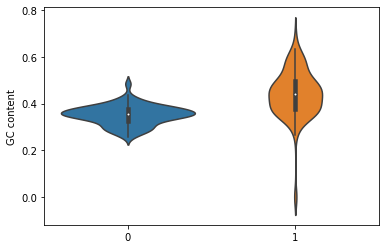

In [24]:
ax = sns.violinplot(data=data)
ax.set_ylabel('GC content')
plt.show()